In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [3]:
import string

#defining stop word and punctuation function

# Basic list of stop words. Consider expanding this list based on your needs.
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", 
    "can", "will", "just", "don", "should", "now", "and", "And", "1", "i'm", 
    "im", "us", "–", "said", "also"
])

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to remove stop words
def remove_stop_words(words):
    return [word for word in words if word not in stop_words]

In [4]:
filename = 'all positive files.txt'
f = open(filename,encoding = "utf-8")
data = f.read()
datalower = data.lower()

In [6]:
# removing punctuation and stop words
text_no_punctuation = remove_punctuation(datalower)
words = text_no_punctuation.split()
words_no_stop_words = remove_stop_words(words)

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [10]:
# Lemmatizing words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop_words]

In [11]:

nltk.download('wordnet')

def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

def replace_farm_words(words):
    replacements = {"farming": "farm", "farmer": "farm", "farms": "farm", "farmers": "farm"}
    return [replacements.get(lemmatize_word(word), word) for word in words]

# Example list of words
word_list = lemmatized_words

# Replace farm-related words
modified_list = replace_farm_words(word_list)

print(modified_list)

['eating', 'organic', 'diet', 'week', 'cause', 'pesticide', 'level', 'drop', 'almost', '90', 'adult', 'research', 'rmit', 'university', 'found', 'study', 'led', 'dr', 'liza', 'oates', 'found', 'particpants’', 'urinary', 'dialkylphosphates', 'daps', 'measurement', '89', 'lower', 'ate', 'organic', 'diet', 'seven', 'day', 'compared', 'conventional', 'diet', 'amount', 'time', 'daps', 'make', '70', '80', 'organophosphate', 'pesticide', 'dr', 'oates', 'people', 'experience', 'large', 'drop', 'organophosphate', 'pesticide', 'level', 'consuming', 'organic', 'food', 'opposed', 'conventional', 'food', 'suggested', 'pesticide', 'come', 'food', 'consumption', 'however', 'recognised', 'could', 'come', 'source', 'people', 'organic', 'phase', 'study', 'still', 'exposure', 'obviously', 'alternate', 'route', 'exposure', 'make', 'better', 'decision', 'find', 'expert', 'think', 'idea', 'supported', 'university', 'adelaide', 'toxicologist', 'dr', 'ian', 'musgrave', 'we’re', 'exposed', 'pesticide', 'residu

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#creating word frequency count
words_count = Counter()
for word in modified_list:
    words_count.update({word,1})

In [14]:
most_common_words = words_count.most_common(51)

In [16]:
x, y = zip(*most_common_words)

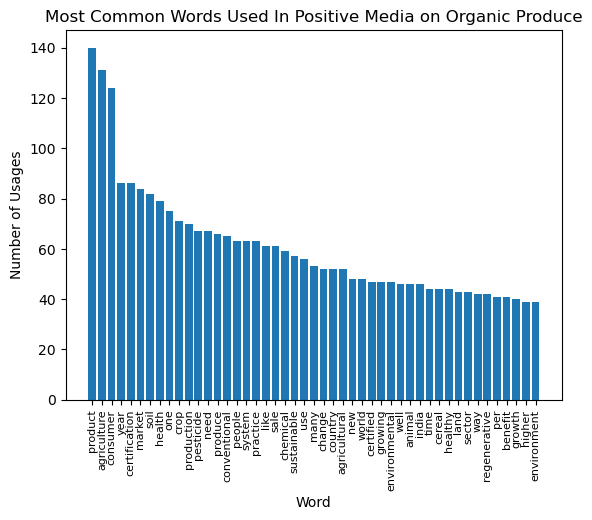

In [19]:
#Plotting from the 4th top words onwards, to remove the disproportionately over-represented words like 'organic'.
plt.bar(x[4:],y[4:])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Word')
plt.ylabel('Number of Usages')
plt.title('Most Common Words Used In Positive Media on Organic Produce')
plt.show()